# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

> **Example:** you are NetFlix, you want to send the compressed representation of your video file to your customer so that it speeds things up. You send less data, so you save money. Actually there are no so efficient for compressed image compared to JPEG ... There are mainly useful for Image denoising

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

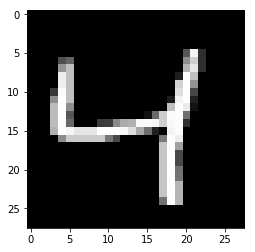

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6901
Epoch: 1/20... Training loss: 0.6866
Epoch: 1/20... Training loss: 0.6824
Epoch: 1/20... Training loss: 0.6776
Epoch: 1/20... Training loss: 0.6729
Epoch: 1/20... Training loss: 0.6627
Epoch: 1/20... Training loss: 0.6565
Epoch: 1/20... Training loss: 0.6488
Epoch: 1/20... Training loss: 0.6355
Epoch: 1/20... Training loss: 0.6231
Epoch: 1/20... Training loss: 0.6111
Epoch: 1/20... Training loss: 0.5927
Epoch: 1/20... Training loss: 0.5812
Epoch: 1/20... Training loss: 0.5637
Epoch: 1/20... Training loss: 0.5476
Epoch: 1/20... Training loss: 0.5306
Epoch: 1/20... Training loss: 0.5178
Epoch: 1/20... Training loss: 0.4942
Epoch: 1/20... Training loss: 0.4727
Epoch: 1/20... Training loss: 0.4551
Epoch: 1/20... Training loss: 0.4381
Epoch: 1/20... Training loss: 0.4262
Epoch: 1/20... Training loss: 0.4203
Epoch: 1/20... Training loss: 0.4024
Epoch: 1/20... Training loss: 0.3853
Epoch: 1/20... Training loss: 0.3742
E

Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.2025
Epoch: 1/20... Training loss: 0.2059
Epoch: 1/20... Training loss: 0.2017
Epoch: 1/20... Training loss: 0.1976
Epoch: 1/20... Training loss: 0.2035
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1996
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.2023
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1964
Epoch: 1/20... Training loss: 0.2026
Epoch: 1/20... Training loss: 0.2026
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.2007
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.2021
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1938
E

Epoch: 2/20... Training loss: 0.1679
Epoch: 2/20... Training loss: 0.1652
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1666
Epoch: 2/20... Training loss: 0.1665
Epoch: 2/20... Training loss: 0.1655
Epoch: 2/20... Training loss: 0.1704
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1627
Epoch: 2/20... Training loss: 0.1628
Epoch: 2/20... Training loss: 0.1637
Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1659
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1663
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1670
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1658
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1647
Epoch: 2/20... Training loss: 0.1632
E

Epoch: 3/20... Training loss: 0.1441
Epoch: 3/20... Training loss: 0.1440
Epoch: 3/20... Training loss: 0.1455
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1481
Epoch: 3/20... Training loss: 0.1439
Epoch: 3/20... Training loss: 0.1433
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1506
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1427
Epoch: 3/20... Training loss: 0.1487
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1459
Epoch: 3/20... Training loss: 0.1472
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1458
Epoch: 3/20... Training loss: 0.1474
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1460
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1443
Epoch: 3/20... Training loss: 0.1500
Epoch: 3/20... Training loss: 0.1450
Epoch: 3/20... Training loss: 0.1458
E

Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1314
Epoch: 4/20... Training loss: 0.1322
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1299
Epoch: 4/20... Training loss: 0.1298
Epoch: 4/20... Training loss: 0.1301
Epoch: 4/20... Training loss: 0.1319
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1325
Epoch: 4/20... Training loss: 0.1327
Epoch: 4/20... Training loss: 0.1299
Epoch: 4/20... Training loss: 0.1354
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1293
Epoch: 4/20... Training loss: 0.1318
Epoch: 4/20... Training loss: 0.1312
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1303
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1306
Epoch: 4/20... Training loss: 0.1259
E

Epoch: 5/20... Training loss: 0.1242
Epoch: 5/20... Training loss: 0.1243
Epoch: 5/20... Training loss: 0.1196
Epoch: 5/20... Training loss: 0.1237
Epoch: 5/20... Training loss: 0.1203
Epoch: 5/20... Training loss: 0.1211
Epoch: 5/20... Training loss: 0.1220
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1189
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1228
Epoch: 5/20... Training loss: 0.1217
Epoch: 5/20... Training loss: 0.1235
Epoch: 5/20... Training loss: 0.1200
Epoch: 5/20... Training loss: 0.1190
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1194
Epoch: 5/20... Training loss: 0.1199
Epoch: 5/20... Training loss: 0.1208
Epoch: 5/20... Training loss: 0.1229
Epoch: 5/20... Training loss: 0.1232
Epoch: 5/20... Training loss: 0.1241
Epoch: 5/20... Training loss: 0.1212
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1197
Epoch: 5/20... Training loss: 0.1176
Epoch: 5/20... Training loss: 0.1241
E

Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1170
Epoch: 5/20... Training loss: 0.1208
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1155
E

Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1107
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1059
E

Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1088
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1080
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1019
E

Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.1039
Epoch: 8/20... Training loss: 0.1061
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.1032
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.1046
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1031
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1041
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1002
E

Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.1056
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1033
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0988
E

Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0951
E

Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0994
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.1005
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0996
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0991
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0900
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0880
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0891
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0982
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0885
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0891
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0880
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0974
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0887
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

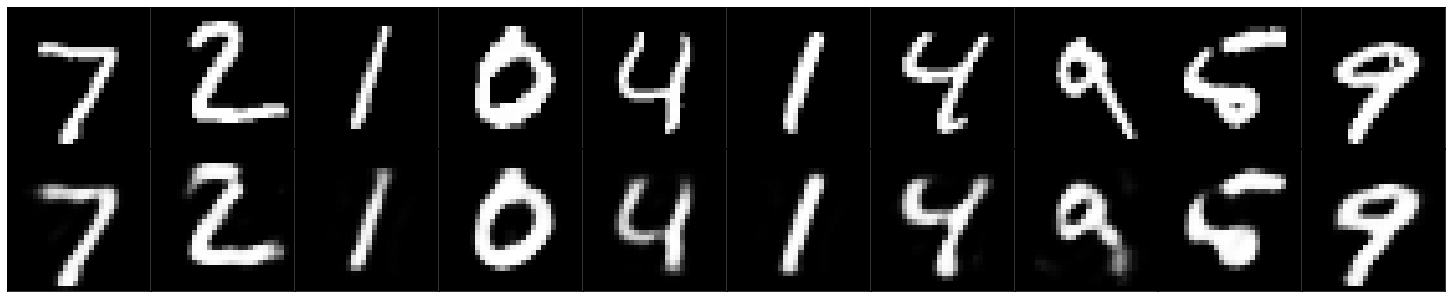

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [11]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.